In [7]:
import time
import pandas as pd
import numpy as np
import math
import random

In [23]:
def some_math(x):
    return round(math.sqrt(x)**math.e,3)
def some_more_math(x):
    return math.sqrt(x**3)+math.pi**2
some_more_math(1)

10.869604401089358

In [26]:
a=[10]*1000000
b=[]
seed=42
for i in range(1000000):
    b.append(random.randint(0,1337))
print(a,b)
test1=pd.Series(a)
test2=pd.Series(b)


, 1211, 1232, 773, 1022, 878, 674, 259, 1031, 219, 43, 1305, 1201, 1083, 1048, 579, 200, 931, 1035, 95, 572, 154, 516, 1218, 1214, 678, 1326, 559, 410, 910, 199, 153, 926, 1224, 311, 254, 643, 1324, 317, 627, 292, 160, 402, 755, 327, 1088, 719, 5, 1026, 76, 1336, 230, 1119, 328, 494, 1062, 930, 595, 1253, 970, 1132, 237, 857, 1176, 798, 376, 112, 922, 859, 1154, 360, 844, 438, 486, 178, 577, 351, 566, 100, 1052, 518, 422, 696, 957, 437, 1161, 264, 647, 965, 1014, 971, 276, 604, 559, 623, 741, 878, 428, 1089, 819, 870, 1291, 1159, 100, 191, 1026, 654, 1197, 353, 1282, 1185, 1304, 1290, 793, 682, 275, 126, 549, 352, 590, 962, 512, 637, 284, 647, 253, 125, 874, 1285, 130, 61, 1202, 893, 243, 120, 3, 453, 921, 1001, 586, 1136, 641, 74, 366, 34, 637, 524, 790, 1079, 239, 467, 147, 1252, 888, 1257, 632, 564, 1038, 658, 1164, 739, 583, 939, 66, 506, 80, 565, 1100, 884, 51, 449, 699, 491, 426, 316, 1087, 581, 1065, 922, 710, 1308, 868, 607, 880, 389, 398, 1185, 1148, 1017, 919, 56, 108, 1184, 

In [31]:
l=[]
wl=[]
inx=0

In [33]:
for i in range(100):
    # lambdas test  
    t1=time.time()
    test1.apply(lambda x:round(math.sqrt(x)**math.e,3))
    test2.apply(lambda x:math.sqrt(x**3)+math.pi**2)
    t2=time.time()
    print(f"WITH lambdas it took {t2-t1}/ms to compleate both tests\n")
    l.append(t2-t1)
    inx+=1
    # without lambdas test
    t1=time.time()
    test1.apply(some_math)
    test2.apply(some_more_math)
    t2=time.time()
    wl.append(t2-t1)
    inx+=1
    print(f"with .apply() it took {t2-t1}/ms to compleat both tests\n")


WITH lambdas it took 2.4123635292053223/ms to compleate both tests

with .apply() it took 2.4298441410064697/ms to compleat both tests

WITH lambdas it took 2.4344072341918945/ms to compleate both tests

with .apply() it took 2.460413694381714/ms to compleat both tests

WITH lambdas it took 2.4715166091918945/ms to compleate both tests

with .apply() it took 2.440384864807129/ms to compleat both tests

WITH lambdas it took 2.456573486328125/ms to compleate both tests

with .apply() it took 2.498784065246582/ms to compleat both tests

WITH lambdas it took 2.3904342651367188/ms to compleate both tests

with .apply() it took 2.3995683193206787/ms to compleat both tests

WITH lambdas it took 2.5608890056610107/ms to compleate both tests

with .apply() it took 2.4031238555908203/ms to compleat both tests

WITH lambdas it took 2.462008476257324/ms to compleate both tests

with .apply() it took 2.3927297592163086/ms to compleat both tests

WITH lambdas it took 2.428900718688965/ms to compleat

In [38]:
data=pd.DataFrame([l,wl])

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.446650,2.412364,2.434407,2.471517,2.456573,2.390434,2.560889,2.462008,2.428901,2.513611,...,2.451587,2.457406,2.439030,2.454260,2.44593,2.452481,2.464868,2.438342,2.462614,2.445274
1,2.429844,2.460414,2.440385,2.498784,2.399568,2.403124,2.392730,2.389552,2.399644,2.488319,...,2.440283,2.450572,2.448546,2.433632,2.45584,2.450405,2.466491,2.442644,2.433857,2.457618


In [40]:
data=data.T

In [41]:
data.head()

,0,1
0,2.446650,2.429844
1,2.412364,2.460414
2,2.434407,2.440385
3,2.471517,2.498784
4,2.456573,2.399568


In [42]:
l[0]

2.4466500282287598

In [46]:
data.columns=['lambda','without_lambda']

In [47]:
data.head()

,lambda,without_lambda
0,2.446650,2.429844
1,2.412364,2.460414
2,2.434407,2.440385
3,2.471517,2.498784
4,2.456573,2.399568


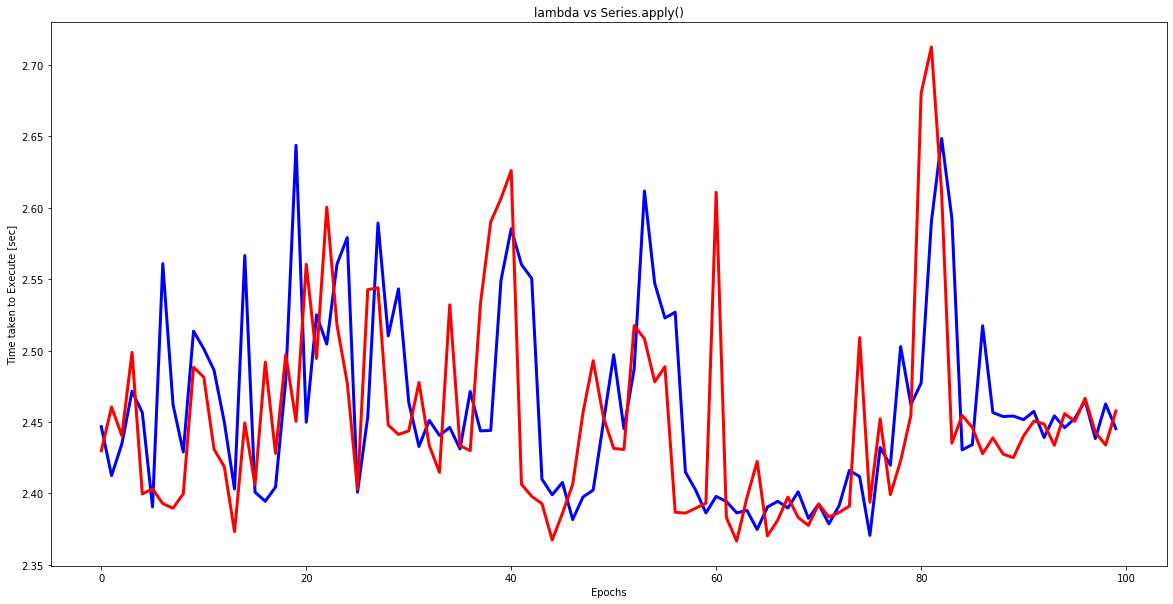

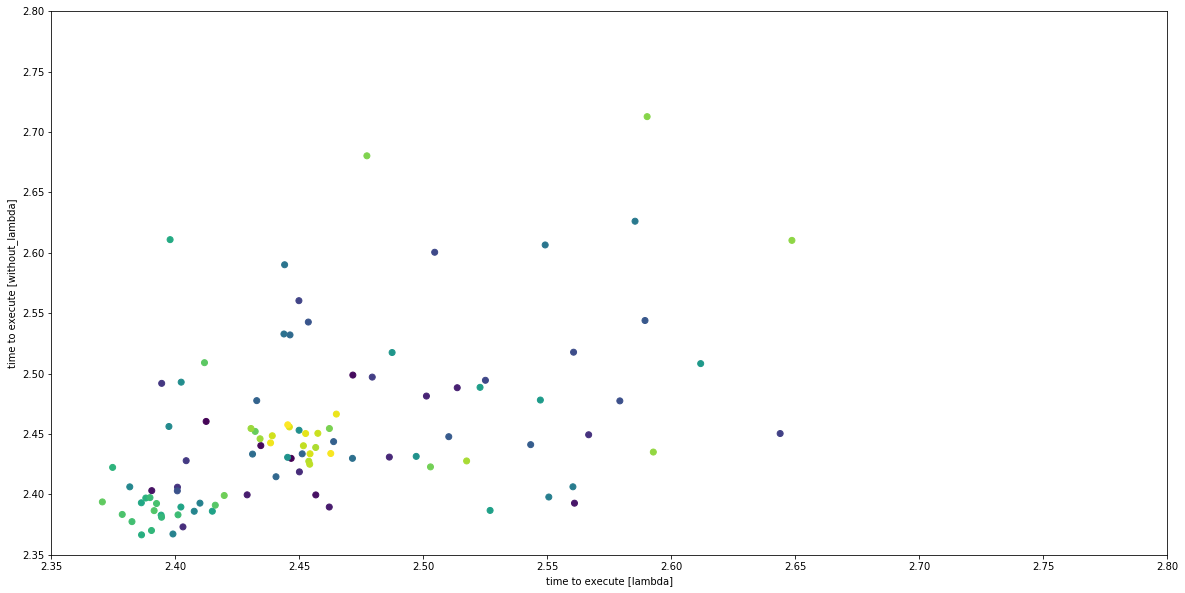

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20,10]
fig,ax=plt.subplots()
ax.plot(data['lambda'],lw=3,c='blue')
ax.plot(data['without_lambda'],lw=3,c='red')
plt.title("lambda vs Series.apply()")
plt.xlabel("Epochs")
plt.ylabel("Time taken to Execute [sec]")
plt.show()
plt.scatter(data['lambda'],data['without_lambda'],c=data.index)
plt.xlabel("time to execute [lambda]")
plt.ylabel("time to execute [without_lambda]")
plt.xlim(2.35,2.8)
plt.ylim(2.35,2.8)
plt.show()

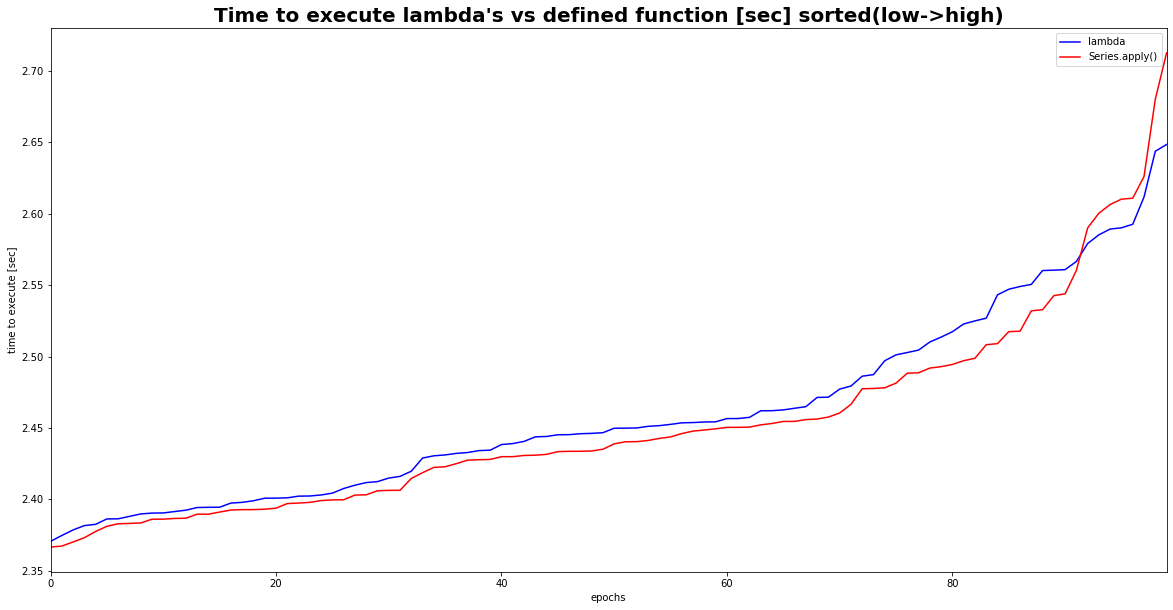

In [63]:
fig,ax=plt.subplots()
pd.Series(sorted(data['lambda'])).plot(ax=ax,c='blue',label='lambda')
pd.Series(sorted(data['without_lambda'])).plot(ax=ax,c='red',label='Series.apply()')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("time to execute [sec]")
plt.title("Time to execute lambda's vs defined function [sec] sorted(low->high)",fontsize=20,fontweight='bold')
plt.show()